In [17]:
### Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')


#### Importando e analisando dados

In [18]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/628/datasets/444cdbf175d5fbf564b564bd36ac21740627a834/diabetes.csv', sep=',')

In [19]:
X = df.drop(['diabetes'], axis=1)
y = df['diabetes']
y = pd.DataFrame(y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [21]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [22]:
### Previsão
y_predic = logreg.predict(X_test)

In [23]:
### Analisando acurácia
acur = logreg.score(X_test, y_test)
acur

0.7402597402597403

In [24]:
### Analisando acurácia
print(confusion_matrix(y_test, y_predic))
print('\n')
print(classification_report(y_test, y_predic))

[[121  30]
 [ 30  50]]


              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



#### Curva ROC

In [25]:
from sklearn.metrics import roc_curve
y_prob = logreg.predict_log_proba(X_test)[:,1]

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

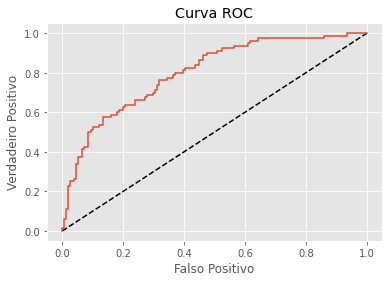

In [27]:
### Plotando gráfico
plt.style.use('ggplot')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC')
plt.show()

#### AUC

In [28]:
### Importando bibliotecas
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [29]:
roc_auc_score(y_test, y_prob)

0.8002483443708608

In [30]:
cross_val_score(logreg, X, y, cv=4, scoring='roc_auc')

array([0.82376119, 0.79689552, 0.83570149, 0.86161194])